## Sentiment analysis of social media for public health monitoring.


### Syntax of Natural Language

Sentiment analysis involves a procedure called **Text Classification**. It is the division of people's thoughts or expressions into several emotions. *Happy, Sad*, *Review Ratings*, and *Positive, Neutral, and Negative* are among the emotions. Sentiment analysis is a useful tool for analyzing people's opinions about a variety of consumer-focused companies and products. 


All of the fundamental ideas and essential terms of NLP and sequence models


<img src="https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg" width="400" />


##  Importing Dependencies

In [1]:
import tensorflow as tf
# install tensorflow 2.1.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk 
from nltk.stem import SnowballStemmer
# nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import re
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.14.0


#  Dataset Preprocessing

In [2]:
df = pd.read_csv("Sentiment140_1.6M_tweets.csv",encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
#selecting columns we need to work on
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head(3)

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [4]:
#doppring the columns we dont need right now
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.text

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        @Kenichan I dived many times for the ball. Man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
                               ...                        
19995    Just woke up. Having no school is the best fee...
19996    TheWDB.com - Very cool to hear old Walt interv...
19997    Are you ready for your MoJo Makeover? Ask me f...
19998    Happy 38th Birthday to my boo of alll time!!! ...
19999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 20000, dtype: object

## EDA

In [5]:
#we are left with 2 columns as shown in output
lab_to_sentiment = {0:"Negative", 4:"Positive"}
#Sentiment coulumn is label encoded and now decoded as per lab_to_sentiment
def label_decoder(label):
  return lab_to_sentiment[label]
  #going through every label( here Sentiment )and labelling every rows of 0,4 as neg, pos
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
#function is applied to every line/rows and saved in df's sentiment (df.sentiment) column
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Decoding the labels. Map **0 -> Negative and 1 -> Positive** as directed by the datset desciption.

Text(0.5, 1.0, 'Sentiment Data Distribution')

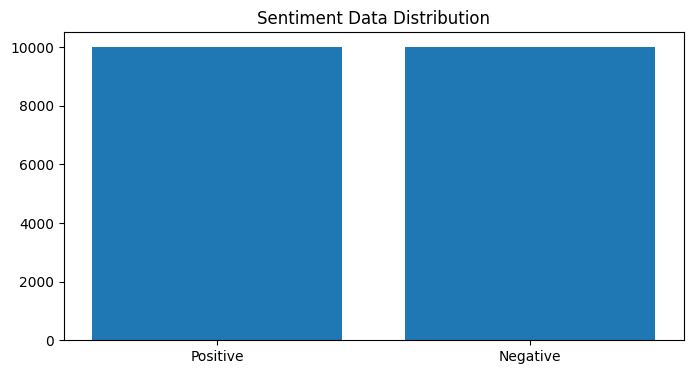

In [6]:
#counting total no. of pos(10001) and negative(9999)
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
#fgiure size, 8 length units, 4 breadth units
plt.bar(val_count.index, val_count.values)
#plotting (x,y) cordinates
plt.title("Sentiment Data Distribution")
#title for chart

In [7]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
2324,Negative,@corienb Kutner's gone?? Really have to see th...
3633,Negative,@PolkaDotSkirt I'm getting my card in two week...
8611,Negative,@ddlovato ahhhh i wish i could go to the dalla...
5614,Negative,Me thinks it's my turn for what @mcarvin has.
9756,Negative,@DJlilE what did i do
19321,Positive,@acousticMike maybe they can't drive 55? Buhah...
10709,Positive,Perfume's new album &quot;â¿&quot; (Triangle)...
12703,Positive,@DanceBekkaDance Hey I thought you might like ...
7361,Negative,it just HAD to snow &gt; dernit
3286,Negative,@MilkyMooMoo yuk! end of year accounts I nee...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  20000 non-null  object
 1   text       20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [9]:
df.describe()

,sentiment,text
count,20000,20000
unique,2,19953
top,Positive,At work
freq,10001,5


# Text Preprocessing

In general we use lot of punctuations and other words without any contextual meaning. Therefore remove punctuations
Clean Tweet texts which consists of other user mentions, hyperlink texts, emoticons and punctuations.


In [10]:
stop_words = stopwords.words('english')
#  is used to retrieve a list of common stopwords in the English language.
# ''' you can easily reference and utilize this list when implementing tasks like text preprocessing, tokenization, or other NLP-related operations. Removing these stopwords can help focus the analysis on the more meaningful words in a piece of text.'''

stemmer = SnowballStemmer('english')
# '''initializes a Snowball stemming algorithm specifically for the English language. Stemming is a text processing task that involves reducing words to their root form, thereby stripping away prefixes and suffixes.'''

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# removes special characters and other things that inhibits from processing text

In [11]:
def preprocess(text, stem=False):

# This function, preprocess, is designed to preprocess text data for natural language processing tasks.

  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  # Here, the function removes non-alphabetic characters using a regular expression pattern defined by text_cleaning_re. It then converts the text to lowercase and removes leading and trailing spaces.

  tokens = []
  # Initialize an empty list, tokens, to store the processed words.

  for token in text.split(): 
      # Iterate through each word in the preprocessed text.

      if token not in stop_words:
          # Check if the word is not a stopword, to ensure it is not included in the final list.

          if stem:
              tokens.append(stemmer.stem(token))
              # If the stem flag is enabled, the function stems the word using the SnowballStemmer algorithm and appends the stemmed word to the tokens list.
          else:
              tokens.append(token)
              # If the stem flag is not enabled, the function appends the original word to the tokens list.

# Finally, the function returns the preprocessed text as a string by joining the list of tokens with spaces.
  return " ".join(tokens)


In [12]:
df.text = df.text.apply(lambda x: preprocess(x))
#the preprocess function is applied on "text" column
df.text

0             awww bummer shoulda got david carr third day
1        upset update facebook texting might cry result...
2        dived many times ball managed save 50 rest go ...
3                         whole body feels itchy like fire
4                                         behaving mad see
                               ...                        
19995                        woke school best feeling ever
19996             thewdb com cool hear old walt interviews
19997                      ready mojo makeover ask details
19998    happy 38th birthday boo alll time tupac amaru ...
19999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 20000, dtype: object

# Aspect Analysis

In [13]:
# # %pip install spacy
# import spacy

# # Load the spaCy English model with NER
# nlp = spacy.load("en_core_web_sm")

# def extract_aspects(text):
#     # Process the text with spaCy
#     doc = nlp(text)
    
#     # Initialize a list to store the extracted aspects
#     aspects = []
    
#     # Extract named entities (aspects)
#     for ent in doc.ents:
#         aspects.append(ent.text)
    
#     return aspects

# # Example usage:
# text = "The new healthcare policy was announced today. COVID-19 cases are on the rise."
# # df.text= df['text'].apply(extract_aspects)
# aspects = extract_aspects(text)
# print("Extracted Aspects:", aspects)

In [14]:
healthcare_aspects = {
    "disease_keywords": ["disease", "outbreak", "pandemic", "flu", "covid", "virus", "epidemic", "health"],
    "health_behavior_keywords": ["diet", "nutrition", "exercise", "smoking", "quitting smoking", "smoking cessation"],
    "medication_keywords": ["medication", "drug", "pharmacy", "prescription", "vitamin", "supplement", "interaction"],
    "well_being_keywords": ["well-being", "mental health", "physical health", "emotional well-being", "happiness", "self-care"]
}

# Function to extract aspects from text
def extract_aspects(text, aspect_keywords):
    extracted_aspects = []
    for aspect_category, keywords in aspect_keywords.items():
        for keyword in keywords:
            if keyword in text:
                extracted_aspects.append(aspect_category)
                break  # Break loop after finding a match in the category
    return extracted_aspects

# Sample text for aspect extraction
sample_text = "The new healthcare policy aims to improve vaccination rates and access to medical facilities."

# Extract aspects from the sample text using healthcare_aspects
extracted_aspects = extract_aspects(sample_text.lower(), healthcare_aspects)
print("Extracted Aspects:", extracted_aspects)

Extracted Aspects: ['disease_keywords']


#### Positive Words

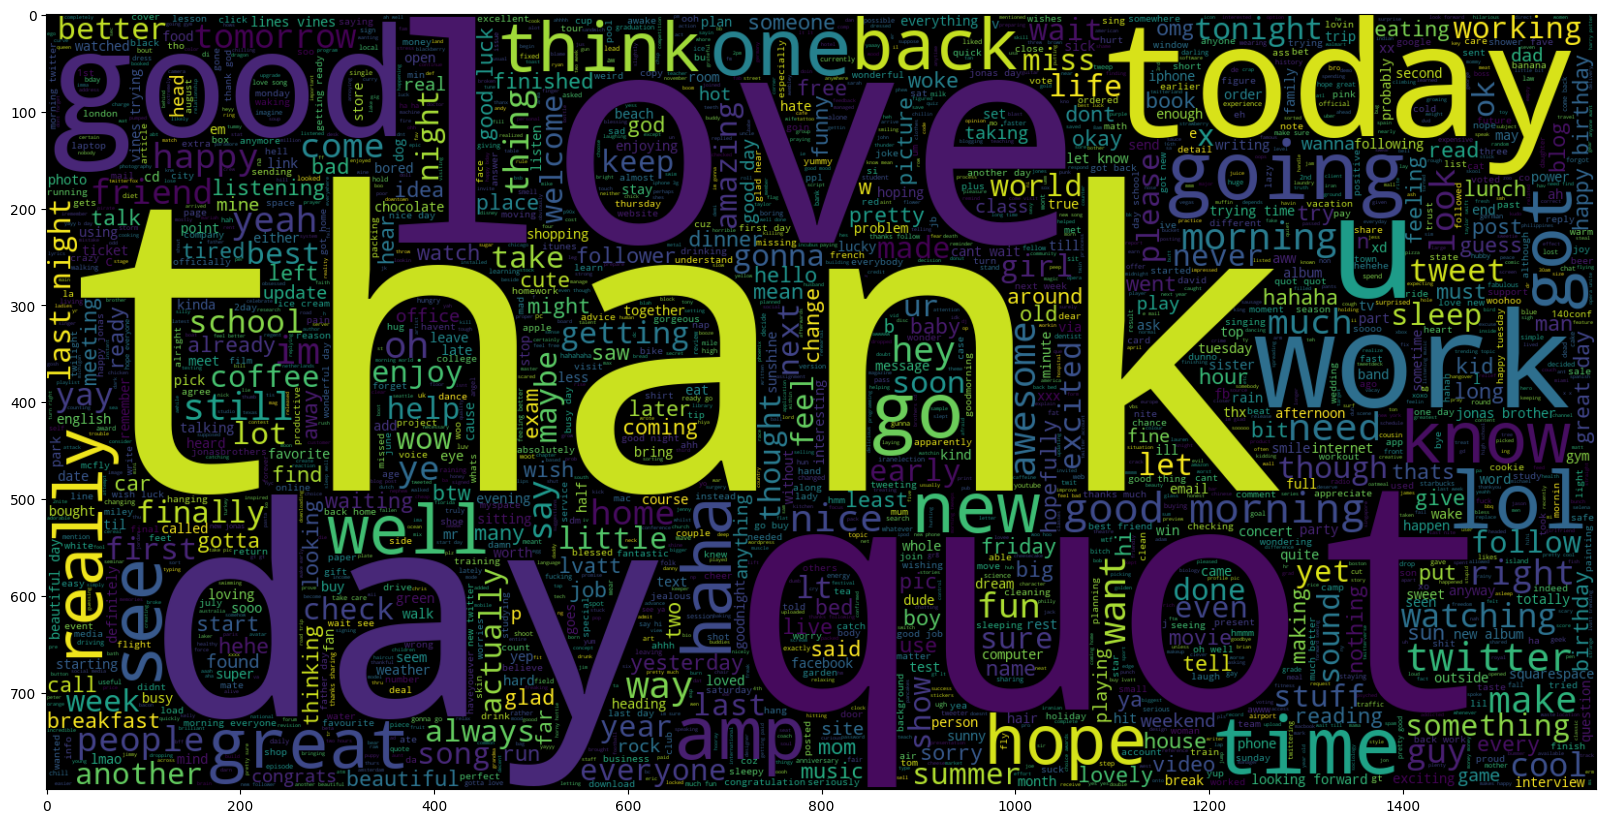

In [15]:
from wordcloud import WordCloud
# Import the WordCloud module to generate a word cloud visualization.

plt.figure(figsize = (20,20)) 
# Create a new figure with a specific size for the plot.

wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
# Generate a word cloud with a maximum of 2000 words, and set the width and height of the word cloud visualization.

plt.imshow(wc , interpolation = 'bilinear') # a weighted average of the values at the four corners of the rectangle
# plt.imshow(wc,interpolation='gaussian')
# plt.imshow(wc,interpolation='quadric')
# plt.imshow(wc,interpolation='bicubic')
# Display the word cloud image with the specified interpolation method.

#### Negative Words

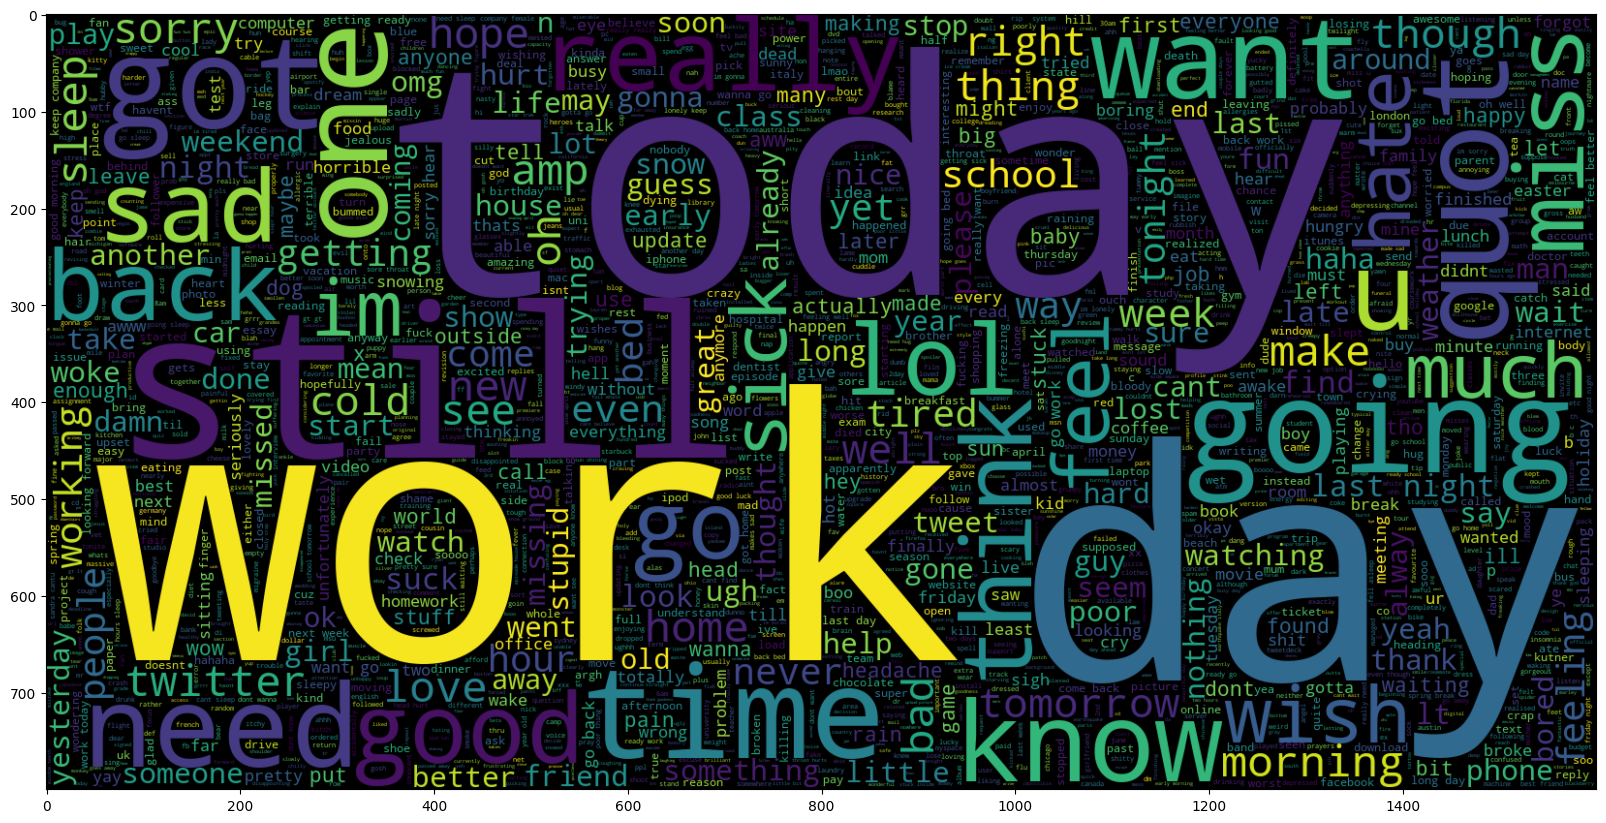

In [16]:
# same for negative text
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# Public Health Data Preparation

#### 1. Early detection of disease outbreaks from social media tweeter

In [17]:
import re

# Define a list of disease-related keywords
disease_keywords = ["disease", "outbreak", "pandemic", "flu", "covid", "virus", "epidemic", "health"]

# Create a function to check if a tweet contains disease-related keywords
def is_related_to_outbreak(text):
    text = text.lower()
    for keyword in disease_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text):
            return 1  # 1 indicates related to outbreak
    return 0  # 0 indicates not related to outbreak

# Add a new column to the dataset indicating outbreak relevance
df['is_outbreak_related'] = df['text'].apply(is_related_to_outbreak)

In [18]:
df# Filter the DataFrame to get rows related to disease outbreaks
outbreak_related_tweets = df[df['is_outbreak_related'] == 1]

# Print the count
print("Number of tweets related to disease outbreaks:", len(outbreak_related_tweets),'\n')


Number of tweets related to disease outbreaks: 40 



In [19]:
# Display the filtered DataFrame
print(outbreak_related_tweets)

      sentiment                                               text  \
621    Negative  umm nope think im insomniac plus got flu lll s...   
777    Negative  sorry loss brother dog sam sick w cushings dis...   
1427   Negative  woke find cold flu illness type thing going wi...   
1502   Negative  ur phone breaking disease spread phone doesnt ...   
1631   Negative                            flu shot work arm hurts   
1727   Negative                                 fairly certain flu   
1902   Negative  ah hate flu third day guess happened accidentl...   
2041   Negative  home flu ahhh suxz well tired go sleep hour go...   
2198   Negative                                                flu   
2239   Negative   borning thats cold virus bunged eyes squinty bah   
2398   Negative                                      flu shot ouch   
2596   Negative         jamming postponed boohoohoozx damn flu bug   
3062   Negative                                                flu   
3312   Negative  ahh

#### 2. Health behaviors, including diet success and smoking cessation

In [20]:
health_behavior_keywords = ["diet", "nutrition", "exercise", "smoking", "quitting smoking", "smoking cessation"]

def is_related_to_health_behavior(text):
    text = text.lower()
    for keyword in health_behavior_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text):
            return 1  # 1 indicates related to health behavior
    return 0  # 0 indicates not related to health behavior

df['is_health_behavior_related'] = df['text'].apply(is_related_to_health_behavior)


In [21]:

# Filter the DataFrame to get rows related to health behaviors
health_behavior_tweets = df[df['is_health_behavior_related'] == 1]

# Print the count
print("Number of tweets related to health behaviour:", len(health_behavior_tweets),'\n')


Number of tweets related to health behaviour: 39 



In [22]:
# Display the filtered DataFrame
print(health_behavior_tweets)

      sentiment                                               text  \
87     Negative  tummy hurts wonder hypnosis anything working g...   
793    Negative  went ihop great diet least kung foo pancakes t...   
1253   Negative  decided rejoin aerobics cos know exercise payi...   
1354   Negative                              diet woke 2day hungry   
2515   Negative  sleep bc drank diet coke 9pm sucks bc wake 5 30am   
2565   Negative  quit smoking cigs dont want look old plus cant...   
2762   Negative                       cant give smoking tried easy   
4157   Negative  ha good idea methinks need proper exercise sto...   
4161   Negative  finally broke exercise bike morning urgently n...   
4434   Negative  eurrrghhhh fan lapsang souching tastes like sm...   
4817   Negative  quot stuff face nothing fruit morning quot die...   
5031   Negative                 great time year eat much must diet   
5622   Negative  god damn hurt ribs seriously cramping exercise...   
6049   Negative     

#### 3. Medication safety, including drug interactions and dietary supplement safety

In [23]:
medication_keywords = ["medication", "drug", "pharmacy", "prescription", "vitamin", "supplement", "interaction"]

def is_related_to_meds(text):
    text = text.lower()
    for keyword in medication_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text):
            return 1  # 1 indicates related to medication/supplement safety
    return 0  # 0 indicates not related to medication/supplement safety

df['is_meds_related'] = df['text'].apply(is_related_to_meds)

In [24]:
# Filter the DataFrame to get rows related to medication and dietary supplements
meds_related_tweets = df[df['is_meds_related'] == 1]

# Print the count
print("Number of tweets related to medicines:", len(meds_related_tweets),'\n')

Number of tweets related to medicines: 9 



In [25]:
# Display the filtered DataFrame
print(meds_related_tweets)

      sentiment                                               text  \
924    Negative  anybody know get electrolytes back order vitam...   
1154   Negative  suddenly miss flintstones vitamin tablets sooo...   
4656   Negative  worst combination ever 2 cups coffee vitamin p...   
5058   Negative  thanks started sniffling like crazy gym today ...   
5139   Negative  picked new glasses yesterday woke morning thou...   
7086   Negative          10 calorie vitamin water quite disgusting   
8793   Negative  drug feet long spending 30 see turbonegro toni...   
10405  Positive  grilled cheese multi vitamin juice going help ...   
14362  Positive  getting 2 trousers stitched emergency u guess ...   

       is_outbreak_related  is_health_behavior_related  is_meds_related  
924                      0                           0                1  
1154                     0                           0                1  
4656                     0                           0                1  
505

#### 4. Individual well-being, which affects mental and physical health

In [26]:
well_being_keywords = ["well-being", "mental health", "physical health", "emotional well-being", "happiness", "self-care"]

def is_related_to_well_being(text):
    text = text.lower()
    for keyword in well_being_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text):
            return 1  # 1 indicates related to well-being
    return 0  # 0 indicates not related to well-being

df['is_well_being_related'] = df['text'].apply(is_related_to_well_being)

In [27]:
# Count the number of rows with is_well_being_related set to 1
well_being_tweets = (df[df['is_well_being_related'] == 1])

# Print the count
print("Number of tweets related to individual well-being:", len(well_being_tweets),'\n')  

Number of tweets related to individual well-being: 6 



In [28]:
print(well_being_tweets)

      sentiment                                               text  \
9672   Negative  disappointed close choose temporary pleasure i...   
16097  Positive                           taking mental health day   
16775  Positive  happiness cuddly pittbull thinks still small e...   
17989  Positive  happiness truly transferable see people withou...   
18108  Positive            tomorrow one class attend yay happiness   
19723  Positive  today one creates happiness share love smile a...   

       is_outbreak_related  is_health_behavior_related  is_meds_related  \
9672                     0                           0                0   
16097                    1                           0                0   
16775                    0                           0                0   
17989                    0                           0                0   
18108                    0                           0                0   
19723                    0                           0     

## Train and testing Split

In [29]:
TRAIN_SIZE = 0.8
# Define the training size, which is set to 0.8, implying that 80% of the data will be used for training.

MAX_NB_WORDS = 100000
# Set the maximum number of words, denoted by MAX_NB_WORDS, to 100,000. This parameter is often used in text processing tasks to limit the number of unique words considered.

MAX_SEQUENCE_LENGTH = 30
# Set the maximum sequence length, denoted by MAX_SEQUENCE_LENGTH, to 30. This parameter determines the maximum length of input sequences in the data. Sequences longer than this value may be truncated.


In [30]:
train_data, testing_data = train_test_split(df, train_size=TRAIN_SIZE, random_state=7)
# Split the dataset into training and testinging sets using the train_test_split function. The testing_size parameter is set to 1 minus TRAIN_SIZE to allocate the remaining percentage of data to the testing set. The random_state is set to 7 for reproducibility.

print("Train Data size:", len(train_data))
# Print the size of the training data, indicating the number of rows in the train_data DataFrame.

print("testing Data size", len(testing_data))
# Print the size of the testing data, indicating the number of rows in the testing_data DataFrame.


Train Data size: 16000
testing Data size 4000


In [31]:
train_data.head(10)
#first 10 rows

,sentiment,text,is_outbreak_related,is_health_behavior_related,is_meds_related,is_well_being_related
8118,Negative,omg im hardest time staying awake class ugh ni...,0,0,0,0
10171,Positive,co workers best famouslyhot,0,0,0,0
9399,Negative,sorry hear homie wut,0,0,0,0
12669,Positive,hey andy get chance check final cover art yet ...,0,0,0,0
18809,Positive,hair appt laying shoppping,0,0,0,0
13869,Positive,great andy im watching music videos youtube lol,0,0,0,0
3320,Negative,soluna slower accord,0,0,0,0
14689,Positive,dishwasher going laundry hubs lunch made littl...,0,0,0,0
13087,Positive,good morning everyone welcome new followers,0,0,0,0
15992,Positive,46th viewed channel today seriously cool check,0,0,0,0


# Tokenization

In [32]:
from keras.preprocessing.text import Tokenizer
# Import the Tokenizer class from Keras for text tokenization.

tokenizer = Tokenizer()
# Initialize a Tokenizer object.

tokenizer.fit_on_texts(train_data.text)
# Fit the Tokenizer on the text data from the training set, train_data.text.

word_index = tokenizer.word_index
# Retrieve the word index, which is a dictionary mapping words to their respective indices obtained from the tokenizer.

vocab_size = len(tokenizer.word_index) + 1
# Calculate the vocabulary size, which is one more than the length of the word index, to account for any new words that might appear in the future.

print("Vocabulary Size :", vocab_size)
# Print the size of the vocabulary, indicating the total number of unique words present in the training data.


Vocabulary Size : 18375


In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Import the pad_sequences module from TensorFlow Keras for sequence padding.

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen=MAX_SEQUENCE_LENGTH)
# Pad the sequences in the training data using the pad_sequences function. This ensures that all sequences have the same length, defined by MAX_SEQUENCE_LENGTH.

x_testing = pad_sequences(tokenizer.texts_to_sequences(testing_data.text), maxlen=MAX_SEQUENCE_LENGTH)
# Pad the sequences in the testing data using the pad_sequences function, maintaining the maximum sequence length specified by MAX_SEQUENCE_LENGTH.

print("Training X Shape:", x_train.shape)
# Print the shape of the training data, x_train, to display the dimensions of the input data for the model.

print("testinging X Shape:", x_testing.shape)
# Print the shape of the testing data, x_testing, to display the dimensions of the input data for the model.


Training X Shape: (16000, 30)
testinging X Shape: (4000, 30)


In [34]:
labels = train_data.sentiment.unique().tolist()
# Obtain the unique values from the 'sentiment' column in the train_data DataFrame, convert them to a list, and assign them to the variable labels.

# In this process we have to make sure the 'sentiment' column exists in the train_data DataFrame.

### Label Encoding 

In [35]:
encoder = LabelEncoder()
# Initialize a LabelEncoder object to encode the categorical labels into numerical values.

encoder.fit(train_data.sentiment.to_list())
# Fit the LabelEncoder on the list of sentiments in the train_data DataFrame.

y_train = encoder.transform(train_data.sentiment.to_list())
# Transform the sentiments in the training data into numerical labels using the LabelEncoder.

y_testing = encoder.transform(testing_data.sentiment.to_list())
# Transform the sentiments in the testing data into numerical labels using the LabelEncoder.

y_train = y_train.reshape(-1,1)
# Reshape the y_train array to ensure it has a single column and the appropriate number of rows.

y_testing = y_testing.reshape(-1,1)
# Reshape the y_testing array to ensure it has a single column and the appropriate number of rows.

print("y_train shape:", y_train.shape)
# Print the shape of y_train, indicating the dimensions of the training labels.

print("y_testing shape:", y_testing.shape)
# Print the shape of y_testing, indicating the dimensions of the testing labels.
y_testing


y_train shape: (16000, 1)
y_testing shape: (4000, 1)


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

# Word Emdedding
- Basically, it's a feature vector representation of words which are used for other natural language processing applications.
- Using **Transfer Learning**. The pre-trained embedding is used in our model.
- The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification.

**GloVe Embedding from Stanford AI** is used [here](https://nlp.stanford.edu/projects/glove/)

In [36]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [37]:
GLOVE_EMB = 'working\glove.6B.300d.txt'
# Assign the variable GLOVE_EMB to the path of the pre-trained GloVe word embeddings file, 'glove.6B.300d.txt'.

EMBEDDING_DIM = 300
# Set the embedding dimension, denoted by EMBEDDING_DIM, to 300. This represents the dimensionality of the word embeddings.

LR = 1e-3
# Define the learning rate, LR, as 0.001, which is equivalent to 1e-3.

BATCH_SIZE = 1024
# Define the batch size, BATCH_SIZE, as 1024. This determines the number of samples to work through before updating the internal model parameters.

EPOCHS = 10
# Set the number of epochs, EPOCHS, to 10. An epoch refers to one complete pass through the entire dataset during the training process.


In [38]:
embeddings_index = {}
# Initialize an empty dictionary, embeddings_index, to store word embeddings.

f = open(GLOVE_EMB,encoding='utf-8')
# Open the pre-trained GloVe word embeddings file, 'glove.6B.300d.txt', for reading. The 'utf-8' encoding is used to handle text data.

for line in f:
    # Iterate through each line in the file.

    values = line.split()
    # Split each line into values.

    word = value = values[0]
    # Retrieve the word from the values.

    coefs = np.asarray(values[1:], dtype='float32')
    # Convert the remaining values to a NumPy array of type 'float32'.

    embeddings_index[word] = coefs
    # Store the word and its corresponding coefficients in the embeddings_index dictionary.

f.close()
# Close the file after reading the contents.

print('Found %s word vectors.' % len(embeddings_index))
# Print the number of word vectors found in the embeddings_index dictionary.


Found 400000 word vectors.


In [39]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
# Create an initial embedding matrix filled with zeros. The dimensions are determined by vocab_size and EMBEDDING_DIM.

for word, i in word_index.items():
    # Iterate through each word and its corresponding index in the word_index dictionary.

    embedding_vector = embeddings_index.get(word)
    # Retrieve the embedding vector for the current word from the embeddings_index dictionary.

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector 
        # If an embedding vector exists for the word, update the corresponding row in the embedding matrix with the vector.

# in this process we have to ensure that the word exists in the embeddings_index dictionary before attempting to retrieve the embedding vector.


In [40]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)
# Create an Embedding layer using TensorFlow's Keras API. This layer will map each integer in the input sequence to a corresponding dense vector from the embedding_matrix.

# The 'vocab_size' parameter denotes the size of the vocabulary.
# The 'EMBEDDING_DIM' parameter specifies the dimensionality of the embedding.
# The 'weights' argument assigns the pre-trained embedding_matrix to the layer.
# The 'input_length' parameter sets the length of input sequences.
# The 'trainable' argument is set to False to ensure that the weights of this layer are not updated during training.


# Model Training - LSTM

In [41]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, concatenate, Embedding
# Import necessary layers from TensorFlow's Keras API for building the neural network architecture.

from tensorflow.keras.layers import SpatialDropout1D
# Import the SpatialDropout1D layer to apply dropout to the embedding layer.

from tensorflow.keras.callbacks import ModelCheckpoint
# Import the ModelCheckpoint callback to save the model during training.


In [42]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# Define the input layer, sequence_input, with the specified shape and data type.

embedding_sequences = embedding_layer(sequence_input)
# Pass the sequence_input through the embedding_layer to obtain the embedding sequences.

x = SpatialDropout1D(0.2)(embedding_sequences)
# Apply SpatialDropout1D to the embedding sequences with a dropout rate of 0.2.

x = Conv1D(64, 5, activation='relu')(x)
# Add a 1D convolutional layer with 64 filters and a kernel size of 5, using the ReLU activation function.

x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
# Apply a Bidirectional LSTM layer with 64 units, incorporating dropout and recurrent dropout for regularization.

x = Dense(512, activation='relu')(x)
# Add a densely connected layer with 512 units and ReLU activation function.

x = Dropout(0.5)(x)
# Apply dropout to the previous layer with a rate of 0.5 for regularization.

x = Dense(512, activation='relu')(x)
# Add another densely connected layer with 512 units and ReLU activation function.

# # New input layers for the additional features
# # outbreak_input = Input(shape=(1,), dtype='float32')
# # health_behavior_input = Input(shape=(1,), dtype='float32')
# # meds_input = Input(shape=(1,), dtype='float32')
# # well_being_input = Input(shape=(1,), dtype='float32')

# outbreak_input = Input(shape=(1,))
# health_behavior_input = Input(shape=(1,))
# # meds_input = Input(shape=(1,))
# # well_being_input = Input(shape=(1,))

# # Merge the LSTM output with the additional features
# # merged = concatenate([x, outbreak_input, health_behavior_input, meds_input, well_being_input])
# merged = concatenate([x, outbreak_input, health_behavior_input])

outputs = Dense(1, activation='sigmoid')(x)
# # Create the output layer with a single unit and a sigmoid activation function for binary classification.

model = tf.keras.Model(sequence_input, outputs=outputs)
# Create the final model using the defined input and output layers.

### Optimization Algorithm
It uses Adam, optimization algorithm for Gradient Descent.

In [43]:
from tensorflow.keras.optimizers import Adam
# Import the Adam optimizer from TensorFlow's Keras API for model optimization.

from tensorflow.keras.callbacks import ReduceLROnPlateau
# Import the ReduceLROnPlateau callback for reducing the learning rate when a metric has stopped improving.

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])
# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy as the metric.

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr=0.01, monitor='val_loss', verbose=1)
# Define the ReduceLROnPlateau callback with a reduction factor of 0.1, a minimum learning rate of 0.01, and 'val_loss' as the monitored metric.

# in this process we have to ensure that the learning rate and other hyperparameters are tuned appropriately for our specific task.


In [44]:
# print("Training on GPU...") if tf.testing.is_gpu_available() else print("Training on CPU...")
# Print "Training on GPU..." if a GPU is available for training, otherwise print "Training on CPU...".

# In this process we have to ensure that the necessary hardware and software requirements are met for training on a GPU.

In [45]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_testing, y_testing), callbacks=[ReduceLROnPlateau])
# Train the model using the fit method with the training data (x_train and y_train) and the specified batch size and number of epochs.

# The validation data is provided as well to monitor the performance on the testing set during training.

# The ReduceLROnPlateau callback is included to dynamically adjust the learning rate if the validation loss has stopped improving.

# Make sure to review the training process and monitor the training and validation metrics for any signs of overfitting or underfitting.


Epoch 1/10
16/16 [==============================] - 19s 690ms/step - loss: 0.6629 - accuracy: 0.5969 - val_loss: 0.6010 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 11s 685ms/step - loss: 0.5928 - accuracy: 0.6868 - val_loss: 0.5730 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 3/10
16/16 [==============================] - 11s 681ms/step - loss: 0.5623 - accuracy: 0.7091 - val_loss: 0.5546 - val_accuracy: 0.7122 - lr: 0.0010
Epoch 4/10
16/16 [==============================] - 11s 676ms/step - loss: 0.5428 - accuracy: 0.7254 - val_loss: 0.5453 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 5/10
16/16 [==============================] - 11s 688ms/step - loss: 0.5236 - accuracy: 0.7413 - val_loss: 0.5405 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 6/10
16/16 [==============================] - 11s 675ms/step - loss: 0.4976 - accuracy: 0.7548 - val_loss: 0.5420 - val_accuracy: 0.7157 - lr: 0.0010
Epoch 7/10
16/16 [==============================] - 11s 657ms/st

# Model Evaluation

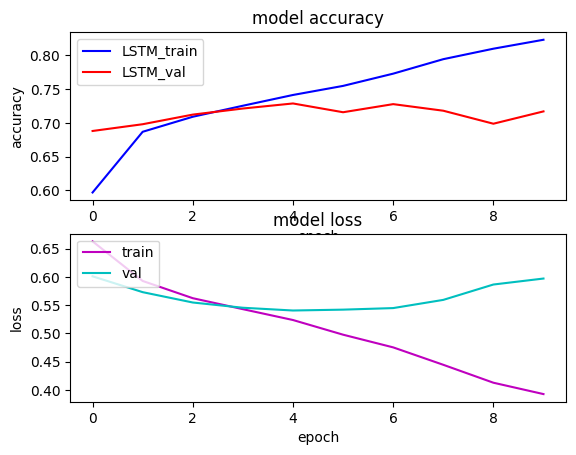

In [46]:
s, (at, al) = plt.subplots(2,1)
# Create a figure with two subplots arranged vertically and assign the subplots to variables at and al.

at.plot(history.history['accuracy'], c= 'b')
# Plot the training accuracy over epochs with a blue line.

at.plot(history.history['val_accuracy'], c='r')
# Plot the validation accuracy over epochs with a red line.

at.set_title('model accuracy')
# Set the title for the accuracy subplot.

at.set_ylabel('accuracy')
# Set the label for the y-axis of the accuracy subplot.

at.set_xlabel('epoch')
# Set the label for the x-axis of the accuracy subplot.

at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')
# Add a legend to the accuracy subplot to distinguish between training and validation accuracy.

al.plot(history.history['loss'], c='m')
# Plot the training loss over epochs with a magenta line.

al.plot(history.history['val_loss'], c='c')
# Plot the validation loss over epochs with a cyan line.

al.set_title('model loss')
# Set the title for the loss subplot.

al.set_ylabel('loss')
# Set the label for the y-axis of the loss subplot.

al.set_xlabel('epoch')
# Set the label for the x-axis of the loss subplot.

al.legend(['train', 'val'], loc='upper left')
# Add a legend to the loss subplot to distinguish between training and validation loss.


The output of prediction score between 0 and 1. It can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [47]:
def decode_sentiment(score):
    return "Positive" if score > 0.5 else "Negative"
# Define a function, decode_sentiment, that returns "Positive" if the score is greater than 0.5, and "Negative" otherwise.

scores = model.predict(x_testing, verbose=1, batch_size=10000)
# Make predictions on the testing data using the trained model and the predict method.

y_pred_1d = [decode_sentiment(score) for score in scores]
# Decode the predicted sentiment scores into "Positive" or "Negative" labels using the decode_sentiment function.

# In this process we have to review the predictions to evaluate the model's performance on the testing data.


1/1 [==============================] - 1s 1s/step


### Confusion Matrix

In [48]:
import itertools
# Import the itertools module for creating iterators for efficient looping.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Import necessary functions from the sklearn.metrics module for computing metrics such as confusion matrix, classification report, and accuracy score.

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Define a function to plot a confusion matrix with the given parameters.

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Normalize the confusion matrix to represent the values as percentages of the true labels.

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)
# Customize the appearance of the confusion matrix plot and add labels and annotations for better interpretation.


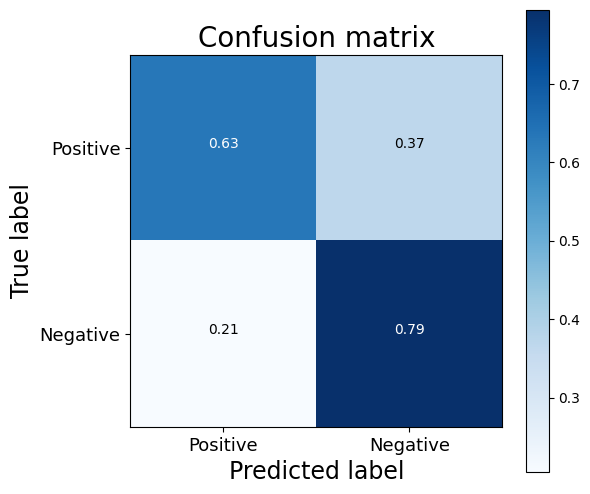

In [49]:
cnf_matrix = confusion_matrix(testing_data.sentiment.to_list(), y_pred_1d)
# Compute the confusion matrix based on the true labels and the predicted labels.

plt.figure(figsize=(6,6))
# Create a new figure with a specific size for the confusion matrix plot.

plot_confusion_matrix(cnf_matrix, classes=testing_data.sentiment.unique(), title="Confusion matrix")
# Plot the confusion matrix using the plot_confusion_matrix function with appropriate parameters.

plt.show()
# Display the confusion matrix plot.


### Classification Scores

In [50]:
# evaluate model with testing set
# print('Accuracy: ',(accuracy_score(y_testing,y_testing)))
print('Accuracy: ', accuracy_score(testing_data.sentiment.to_list(), y_pred_1d))

#classification report
print('\n')

print(classification_report(list(testing_data.sentiment), y_pred_1d))
# Print the classification report, including precision, recall, F1-score, and support for each class.
# In this process we have to review the classification report to assess the model's performance on different metrics.


Accuracy:  0.717


              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68      1923
    Positive       0.70      0.79      0.74      2077

    accuracy                           0.72      4000
   macro avg       0.72      0.71      0.71      4000
weighted avg       0.72      0.72      0.71      4000



# Demonstration Code

**Note:** Any sentences can be written in new1 list but senetences should be separated with comma and should have enclosed text with apostrophe

In [51]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Preprocess the new texts in the list new1.
new1=['hello how are you','you look beautiful','you are ugly']
new1_processed = [preprocess(text) for text in new1]

# Convert the preprocessed texts into sequences.
new1_sequences = tokenizer.texts_to_sequences(new1_processed)

# Pad the sequences with the specified maximum sequence length.
new1_padded = pad_sequences(new1_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Make predictions on the new texts using the trained model.
new1_predictions = model.predict(new1_padded, verbose=1, batch_size=10000)

# Decode the predicted sentiment scores into positive or negative sentiments.
new1_sentiments = [decode_sentiment(score) for score in new1_predictions]

# Print the predicted sentiments for the new texts.
print(new1_sentiments)

# Make sure the preprocessing steps and model predictions are accurately applied to the new text data.


1/1 [==============================] - 0s 40ms/step
['Positive', 'Positive', 'Negative']


## Save model

In [52]:
# model.save(KERAS_MODEL)
# w2v_model.save(WORD2VEC_MODEL)
# pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
# pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)